In [2]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
import platform
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train=np.expand_dims (x_train, axis=3)
x_test=np.expand_dims (x_test, axis=3)
input_shape=x_train[0].shape
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=input_shape,activation='relu'),
tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu',padding='same'),
tf.keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu',padding='same'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu',padding='same'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
model.evaluate(x_test, y_test)

W1011 15:32:46.379255  6180 deprecation.py:506] From C:\Users\Artem\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2929 - acc: 0.9095
Epoch 2/3
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0860 - acc: 0.9747
Epoch 3/3
10000/10000 [==============================] - 4s 378us/sample - loss: 0.0255 - acc: 0.9912s - loss: 0.


[0.025455387511570008, 0.9912]

In [3]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


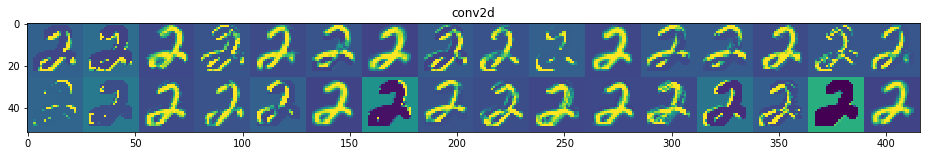

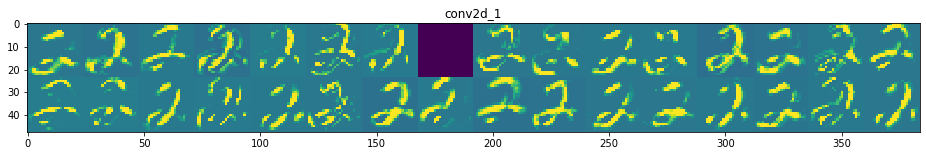

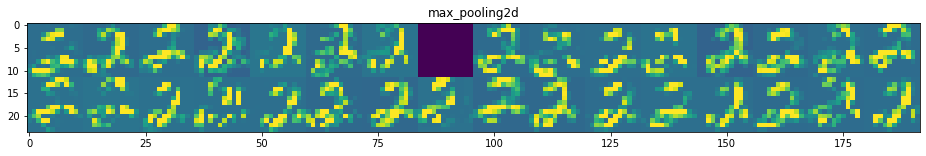

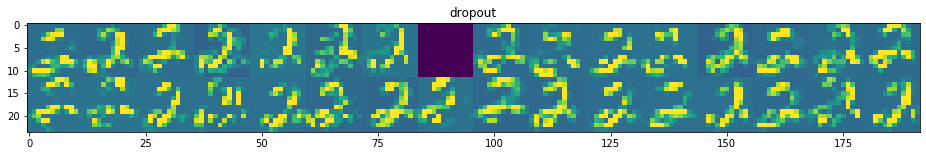

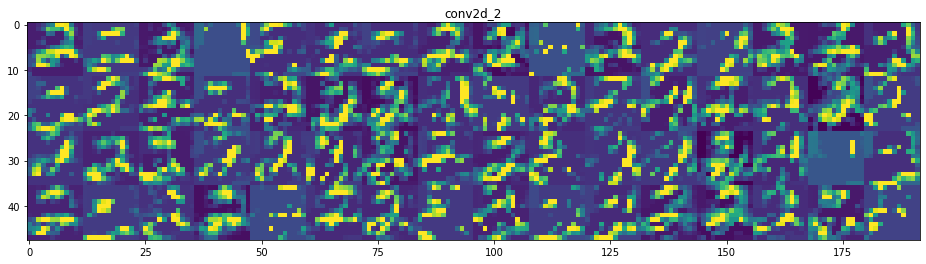

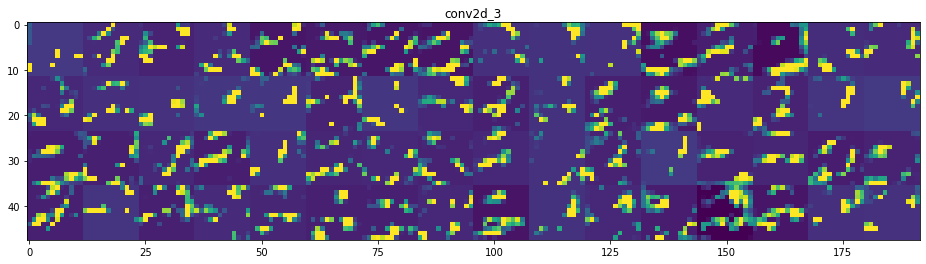

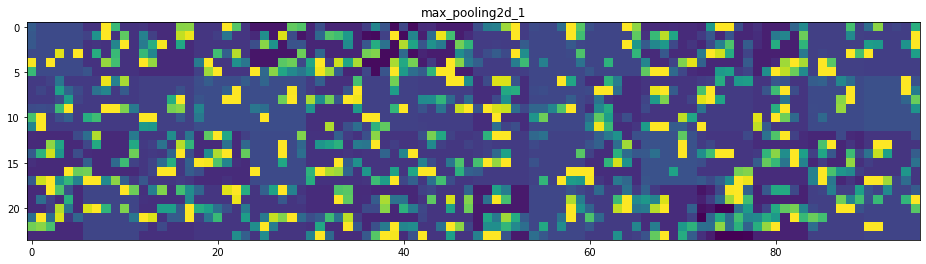

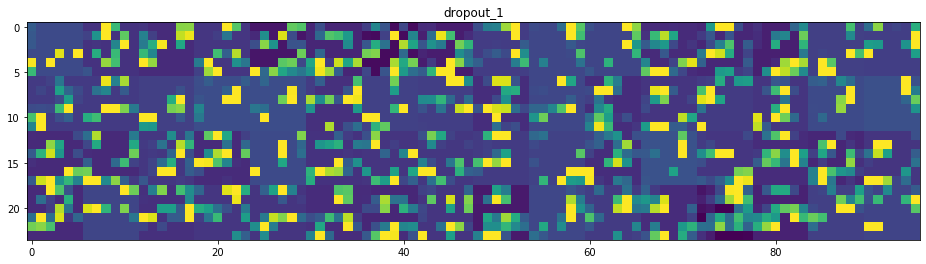

In [25]:
test_im=x_train[2939]
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)
activations=activation_model.predict(test_im.reshape(1,28,28,1))

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1]# Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')